<a href="https://colab.research.google.com/github/dhyey2503/Stock-Market-Analysis-and-Forecasting-using-LSTM-and-Sentiment-Analysis-with-Streamlit-Dashboard/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn yfinance tweepy newsapi-python nltk vaderSentiment plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200


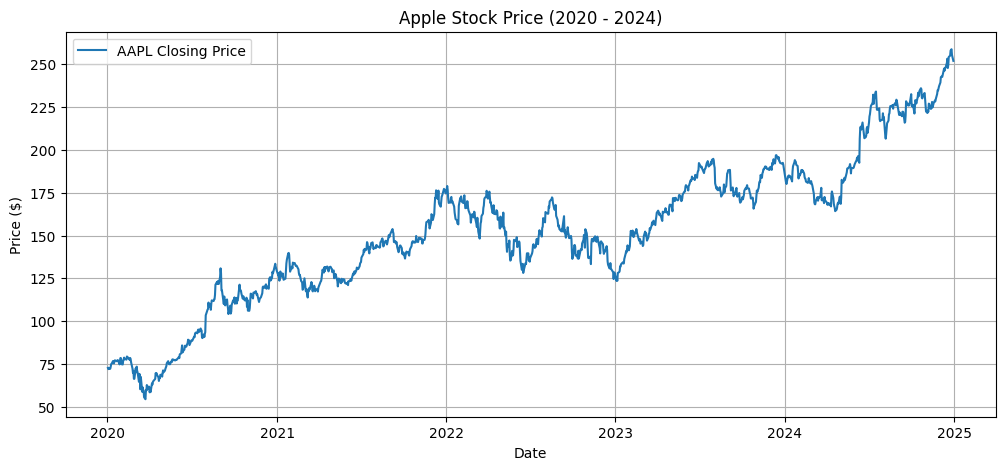

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Price (2020 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
analyzer = SentimentIntensityAnalyzer()
text = "Apple stock is performing really well!"
sentiment = analyzer.polarity_scores(text)
print(sentiment)


{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.3989}


In [6]:
import yfinance as yf

# Download stock data
ticker = 'AAPL'  # You can change to 'TSLA', 'GOOGL', etc.
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
df.head()



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200


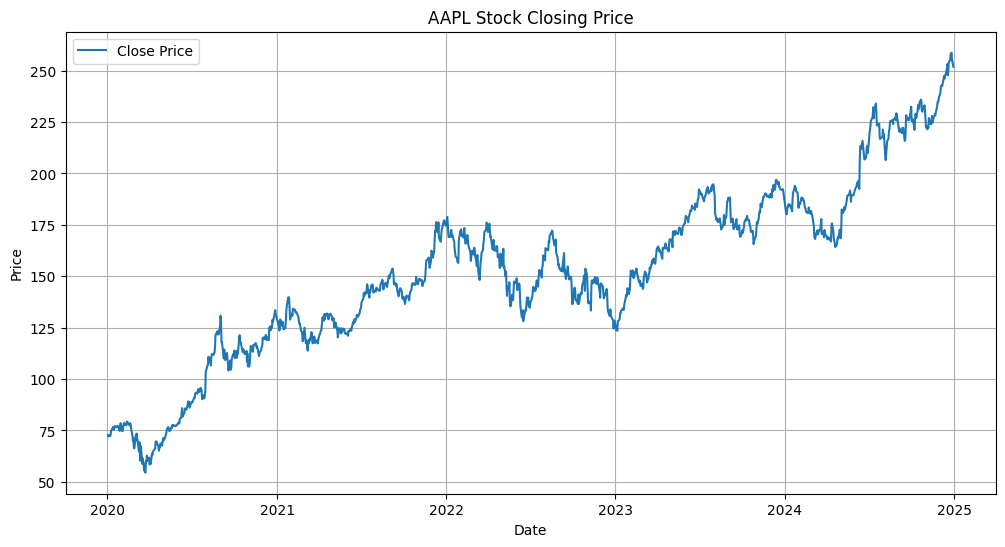

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'Moving Averages'}, xlabel='Date'>

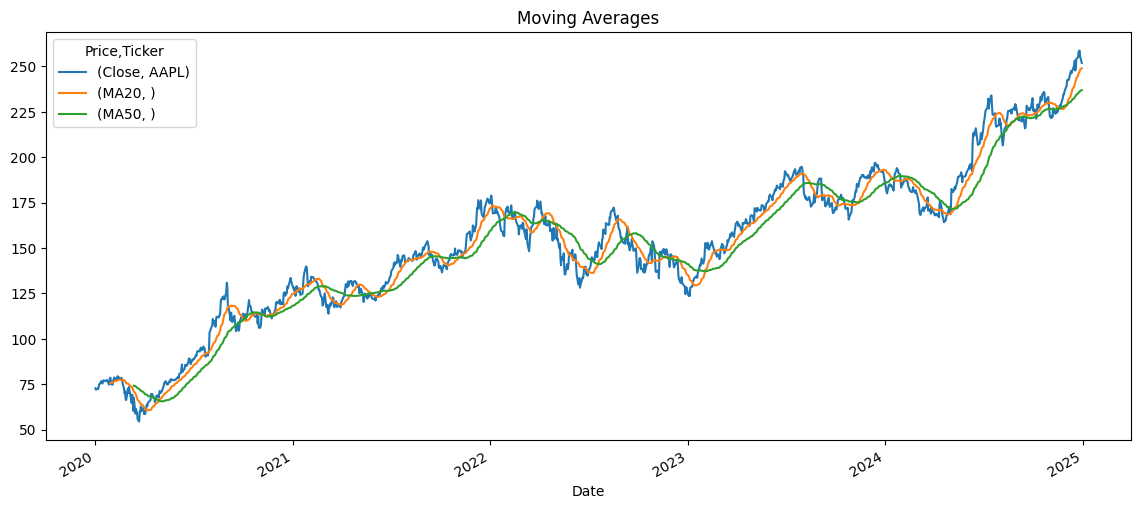

In [8]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

df[['Close', 'MA20', 'MA50']].plot(figsize=(14, 6), title='Moving Averages')


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
text = "Apple stock is expected to rise due to strong earnings!"
score = analyzer.polarity_scores(text)
print(score)


{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.5562}


In [10]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi03orv0m/_hwa2ms4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi03orv0m/5gpybi3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71958', 'data', 'file=/tmp/tmpi03orv0m/_hwa2ms4.json', 'init=/tmp/tmpi03orv0m/5gpybi3k.json', 'output', 'file=/tmp/tmpi03orv0m/prophet_model_yr0ujnt/prophet_model-20250417075002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


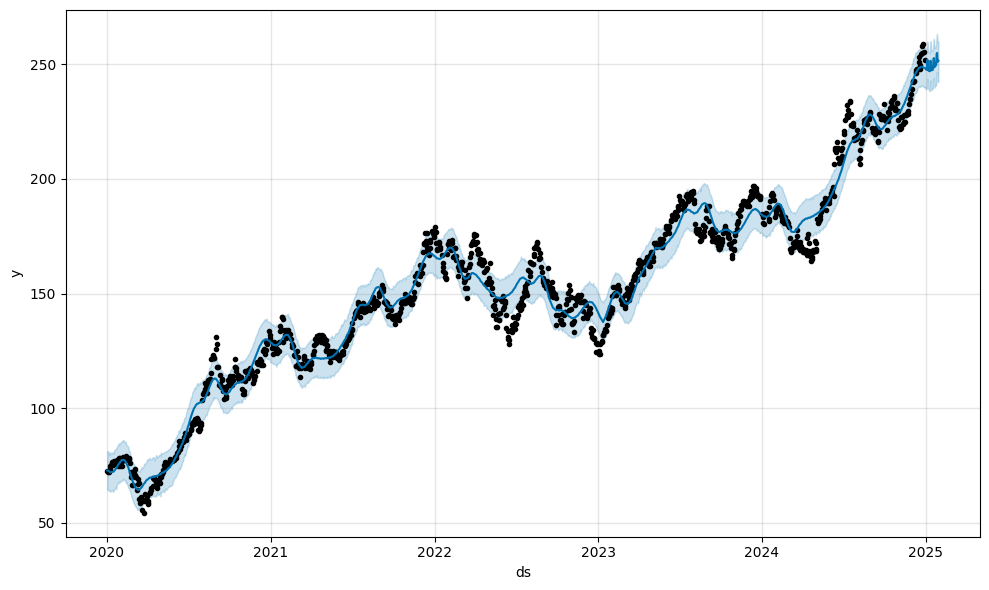

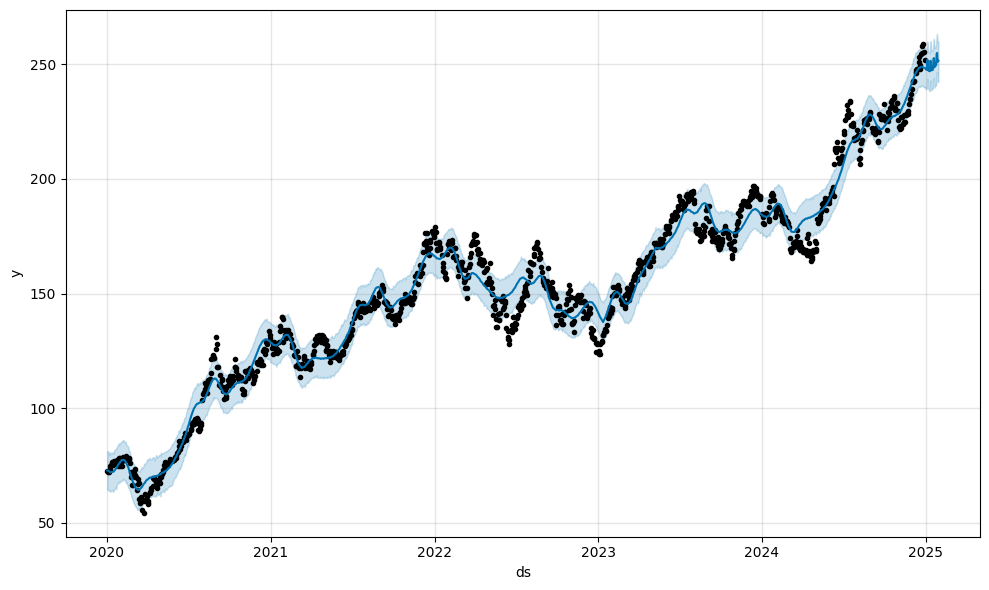

In [11]:
from prophet import Prophet

# Prepare data
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Model
model = Prophet()
model.fit(df_prophet)

# Future prediction
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot
model.plot(forecast)


In [12]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA20'], name='MA 20'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], name='MA 50'))
fig.update_layout(title='Stock Price with Moving Averages')
fig.show()



In [13]:
df.info()
df.head(30)  # Check the first 30 rows


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
 5   (MA20, )        1238 non-null   float64
 6   (MA50, )        1208 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


Price,Close,High,Low,Open,Volume,MA20,MA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400,NaN,NaN
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,NaN,NaN
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000,NaN,NaN
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200,NaN,NaN
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400,NaN,NaN
2020-01-10,75.132263,75.698794,74.628689,75.197636,140644800,NaN,NaN
2020-01-13,76.737427,76.764062,75.330800,75.449437,121532000,NaN,NaN


In [14]:
import plotly.graph_objects as go

# Drop NaNs
df_filtered = df.dropna(subset=['MA20', 'MA50'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['MA20'], name='MA 20'))
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['MA50'], name='MA 50'))
fig.update_layout(title='Stock Price with Moving Averages')
fig.show()


KeyError: ['MA20', 'MA50']

In [15]:
df.columns


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL'),
            (  'MA20',     ''),
            (  'MA50',     '')],
           names=['Price', 'Ticker'])

In [16]:
df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df.columns]


In [17]:
df.columns


Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       'MA20', 'MA50'],
      dtype='object')

In [18]:
import plotly.graph_objects as go

df_filtered = df.dropna(subset=['MA20', 'MA50'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Close_AAPL'], name='Close Price'))
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['MA20'], name='MA 20'))
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['MA50'], name='MA 50'))
fig.update_layout(title='Stock Price with Moving Averages')
fig.show()


In [19]:
!pip install yfinance scikit-learn pandas numpy matplotlib tensorflow


In [20]:
import yfinance as yf

df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
df = df[['Close']]
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2010-01-04,6.440331
2010-01-05,6.451467
2010-01-06,6.348845
2010-01-07,6.337110
2010-01-08,6.379239


In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create training data
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0268
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0015
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0012
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0012
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0012
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 9.8342e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0010
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0012
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0015
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 8.6341e-04


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


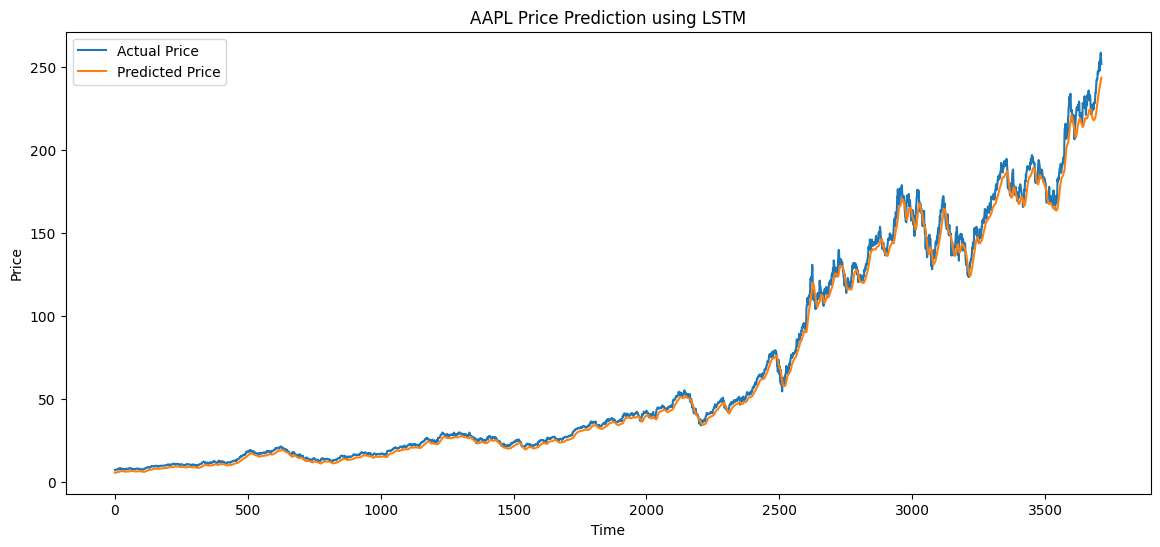

In [23]:
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.title("AAPL Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [24]:
!pip install tweepy newsapi-python vaderSentiment


In [25]:
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key='282d5180b7744b0fae2d3bb88460f70d')
articles = newsapi.get_everything(q='Apple stock', language='en', page_size=100)

news_texts = [article['title'] + ". " + article['description'] for article in articles['articles'] if article['description']]


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # compound is overall sentiment

# For Tweets or News
sentiments = [get_sentiment(text) for text in news_texts]


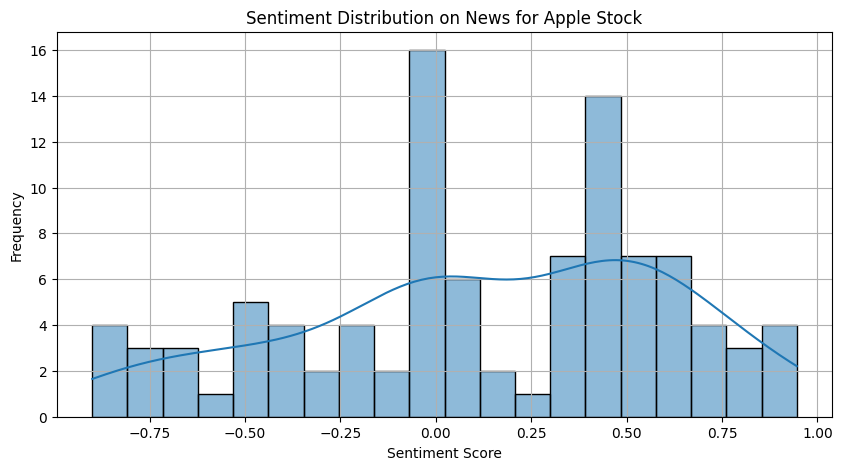

Average Sentiment: 0.1274848484848485


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,5))
sns.histplot(sentiments, bins=20, kde=True)
plt.title('Sentiment Distribution on News for Apple Stock')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optional: Average sentiment
print("Average Sentiment:", np.mean(sentiments))


In [1]:
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
import numpy as np

# Title
st.title("📈 Stock Analysis Dashboard with Sentiment")

# Sidebar
ticker = st.sidebar.text_input("Enter Stock Ticker", "AAPL")
start_date = st.sidebar.date_input("Start Date", pd.to_datetime("2020-01-01"))
end_date = st.sidebar.date_input("End Date", pd.to_datetime("today"))

# Download stock data
data = yf.download(ticker, start=start_date, end=end_date)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

st.subheader(f"{ticker} Stock Price with Moving Averages")
st.line_chart(data[['Close', 'MA20', 'MA50']])

# Sentiment Analysis (News API)
st.subheader("📰 News Sentiment")
try:
    newsapi = NewsApiClient(api_key='YOUR_NEWS_API_KEY')
    articles = newsapi.get_everything(q=f'{ticker} stock', language='en', page_size=50)
    news_texts = [art['title'] + ". " + art['description'] for art in articles['articles'] if art['description']]

    analyzer = SentimentIntensityAnalyzer()
    sentiments = [analyzer.polarity_scores(text)['compound'] for text in news_texts]

    avg_sentiment = np.mean(sentiments)
    st.metric("Average Sentiment Score", round(avg_sentiment, 3))
    st.bar_chart(sentiments)
except:
    st.warning("Could not load sentiment data. Check your News API Key.")

# Footer
st.markdown("---")
st.caption("Made with ❤️ for Final Year Project")


ModuleNotFoundError: No module named 'streamlit'

In [2]:
!pip install streamlit yfinance pandas matplotlib vaderSentiment newsapi-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00
